# §2. Risk Management

Using statistical analysis tools such as variance, covariance, and standard deviation, the risk of a given security can be assessed.

The following notebook represents notes taken from the *Python for Finance: Investment Fundamentals & Data Analytics* Udemy course. All credit for the content of the lecture goes to 365 Cereers.

## <a name="TOC"></a> Table of Contents
---

1. [Standard Deviation & Risk](#STDV)
2. [Variance for Risk](#VAR)
3. [Covariance and Correlation for Diversification](#COVCORR)
4. [Correlation for Arbitrage](#CORRARB)
5. [Calculating Portfolio Risk](#PORTRISK)
6. [Calculating Diversifiable and Un-Diversifiable Risks](#DIVUNDIV)
  1. [Diversifiable Risk](#DIVRISK)
  2. [Un-Diversifiable Risk](#UNDIVRISK)
7. [Developed Functions](#FUNK)

## <a name="STDV"></a> [Standard Deviation & Risk](#TOC)
---

In [375]:
# ---------- SETUP ENVIRONMENT ---------- #

%reset -f

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


# ---------- IMPORT DATA FROM YAHOO ---------- #

# Define tickers of interest
tickers = 'PG BEI.DE'.split()

# Instantiate dataframe
Port = pd.DataFrame()

# Import data
for t in tickers:
    Port[t] = wb.DataReader(t, data_source = 'yahoo', start = '2007-1-1')['Adj Close']
    
    
# ---------- CALCULATE RETURNS ---------- # 

Returns = np.log(Port / Port.shift(1))
print(Returns[0:15])

                  PG    BEI.DE
Date                          
2007-01-03       NaN       NaN
2007-01-04 -0.007621  0.006545
2007-01-05 -0.008625 -0.020772
2007-01-08  0.002202  0.000202
2007-01-09 -0.002517 -0.022858
2007-01-10  0.011901 -0.012673
2007-01-11  0.006207  0.007498
2007-01-12  0.005554  0.009295
2007-01-16  0.000000  0.024572
2007-01-17  0.010304 -0.041784
2007-01-18  0.002750  0.011025
2007-01-19  0.008357 -0.002071
2007-01-22 -0.005615 -0.000829
2007-01-23 -0.001218  0.001037
2007-01-24 -0.001982  0.013382


Let's examine the average annual returns and standard deviations of the returns of both securities.

In [ ]:
# ---------- STUDY PORTFOLIO STATISTICS ---------- #

# PG stats
pgSROR = round((Returns['PG'].mean() * 250 * 100), 4)
pgSTDV = round((Returns['PG'].std() * 250 ** 0.5), 4)

print('PG Statistics\n')
print('Average Annual Return: ', pgSROR, '%')
print('Standard Deviation: ', pgSTDV, '\n')

# PG stats
beiSROR = round((Returns['BEI.DE'].mean() * 250 * 100), 4)
beiSTDV = round((Returns['BEI.DE'].std() * 250 ** 0.5), 4)

print('BEI.DE Statistics\n')
print('Average Annual Return: ', beiSROR, '%')
print('Standard Deviation: ', beiSTDV, '\n')


Both stocks have similar returns but the standard deviation of PG is less than that of BEI.DE, meaning that you can achieve similar returns for less risk.

## <a name="VAR"></a> [Variance for Risk](#TOC)
---

In statistics, variance represents how much a stock deviates from its average value. It is calculated by taking the square of the deviation from the mean. Using this measurement, we can develop an expectation of how predictable or unpredictable a security will behave in the future, based on its past performance.

In [378]:
# ---------- STUDY SECURITY STATISTICS ---------- #

# PG stats
pgVAR  = round(Returns['PG'].var(), 4)
pgAVAR = round((Returns['PG'].var() * 250), 4)

print('PG Statistics\n')
print('Variance: \t', pgVAR)
print('Annual Variance: ', pgAVAR, '\n')

# PG stats
beiVAR  = round(Returns['BEI.DE'].var(), 4)
beiAVAR = round((Returns['BEI.DE'].var() * 250), 4)

print('BEI.DE Statistics\n')
print('Variance: \t', beiVAR)
print('Annual Variance: ', beiAVAR, '\n')

PG Statistics

Variance: 	 0.0001
Annual Variance:  0.0303 

BEI.DE Statistics

Variance: 	 0.0002
Annual Variance:  0.0475 



The variance results are concordant with our standard deviation results. The BEI.DE instrument is clearly more volatile that PG. Let's see how they relate to each other using the covariance matrix.

## <a name="COVCORR"></a> [Covariance and Correlation for Diversification](#TOC)
---

The covariance of two securities will yield the degree to which securities move together. We will find that the covariance between the stocks will be $0$ (no relation), $-1$ (inversely related), or $1$ (positively related). Our calculations will yield a covariance matrix like the following:

| $\text{var}(\text{PG})$             | $\text{cov}(\text{PG}, \text{BEI})$ |
|-------------------------------------|-------------------------------------|
| $\text{cov}(\text{BEI}, \text{PG})$ | $\text{var}(\text{PG})$             |

When using covariance, we are looking to determine which securities are related to each other and how they might respond to changing market conditions. Ergo, we can diversify a portfolio by selecting instruments which are not correlated, and thus are not likely to respond to a bear market the same way. Keep in mind, covariance tells us the direction of the relationship (positive or negative or null) whereas correlation communicates the magnitude of the relationship.

In [ ]:
# ---------- FIND COVARIANCE MATRIX ---------- #

# Covariance
portCOV = Returns.cov()
portCOV

In [ ]:
# Annual Covariance
portCOV = Returns.cov() * 250
portCOV

These values check out but they are less useful to us, let's use these values to find the correlation between the two stocks.

In [ ]:
# ---------- FIND CORRELATION MATRIX ---------- #

portCORR = Returns.corr()
portCORR

As we can see, the stocks returns are approximately 25% correlated. This means that the two securities are not likely to move together through business cycles. Naturally, the stocks are perfectly correlated with themselves. Although this is not discussed in the Udemy course, let's use these findings to explore correlation arbitrage.

## <a name="CORRARB"></a> [Correlation for Arbitrage](#TOC)
---

In finance, an arbitrage opportunity is one in which market inefficiency results in financial gain. For instance, when two markets are buying and selling the same good but for two different prices, one can buy a security for a lesser price and sell at the higher price to make a profit. This creates a sudden demand where the price is lower and a supply where the price is higher. At large enough volumes, these behaviors can close the gaps between the markets and end the arbitrage opportunity.

In the conventional definition, arbitrage deals with almost perfectly correlated securities because the securities are one and the same. However, one can find arbitrage opportunities within the same industries. In the following example, we will look at three of the largest automotive manufacturers and find which two are the most strongly correlated. These two different equities can be treated like the same security.

In [342]:
# ---------- IMPORT DATA FROM YAHOO ---------- #

# Define tickers of interest
autoTickers = 'FCA F GM'.split()

# Instantiate dataframe
Auto = pd.DataFrame()

# Import data
for t in autoTickers:
    Auto[t] = wb.DataReader(t, data_source = 'yahoo', start = '2007-1-1')['Adj Close']
    
    
# ---------- CALCULATE STATISTICS ---------- # 

# Find returns
AutoReturns = np.log(Auto / Auto.shift(1))

# Find correlation matrix
autoCORR = AutoReturns.corr()
autoCORR

,FCA,F,GM
FCA,1.000000,0.276734,0.269326
F,0.276734,1.000000,0.709208
GM,0.269326,0.709208,1.000000


Unsurprisingly, General Motors (GM) and Ford Motor Company (F) are 70% correlated. This means that we could theoretically predict price movements of one company using the movements of the other. Keep in mind that, while this behavior helps the markets correlate and become more predictable, this strategy does not produce anything for other people nor directly take equity in a company of value. Use with moral caution.

## <a name="PORTRISK"></a> [Calculating Portfolio Risk](#TOC)
---

When creating a portfolio with several securities involved, it is important to understand how the variances of the individual instruments will affect the variance of the portfolio as a whole. Using the following algebraic relationship, we can find the variance of a portfolio with two securities:

$
(w_1 \sigma_1 + w_2 \sigma_2)^2 = w_1^2 \sigma_1^2 + 2 w_1 \sigma_1 w_2 \sigma_2 \rho_{12} + w_2^2 \sigma_2^2
$

Where $w_n$ represents the weight of the $n^{\text{th}}$ security, $\sigma_n$ represents the standard deviation of the $n^{\text{th}}$ security, and $\rho_{12}$ is the correlation of the two securities.


In [376]:
# ---------- SETUP PORTFOLIO ---------- #

# Define weights
weights = np.array([0.5, 0.5])

# Check sum
if weights.sum() != 1: print("Error: Weights are imbalanced.")
else: pass

# ---------- DETERMINE PORTFOLIO STATS ---------- #

print("Expected Portfolio Statistics \n")

# Expected portfolio return
expSROR = round((np.sum(weights * Returns.mean()) * 250 * 100), 4)
print("Rate of Return:\t\t", expLROR, " %")

# Expected variance
expVAR = round((np.dot(weights.T, np.dot(Returns.cov() * 250, weights))), 4)
print("Portfolio Variance:\t", expVAR)

# Expected volatility
expVOL = round(( np.sqrt(np.dot(weights.T, np.dot(Returns.cov() * 250, weights))) ) * 100, 4)
print("Portfolio Volatility:\t", expVOL, '%')

Expected Portfolio Statistics 

Rate of Return:		 6.0023  %
Portfolio Variance:	 0.0243
Portfolio Volatility:	 15.5911 %


## <a name="DIVUNDIV"></a> [Calculating Diversifiable and Un-Diversifiable Risks](#TOC)
---

Recall that portfolio variance is a result of the variance of individual securities and the correlations of several securities together. There are two types of investment risk: Un-Diversifiable (systematic) and Diversifiable (un-systematic) risk.

Systematic risk depends on the variances of individual securities. It results from consumer spending changes, wars, forces of nature, etc. Investors cannot control for risks affecting the economy as a whole.

On the other hand, un-systematic risk is the result of idiosyncracies within individual companies. For instance, some companies are mismanaged, some industries suffer recessions, but by diversifying your equity holdings over many companies and industries, you can eliminate this idiosyncratic risk. Studies show that by holding 25 or more properly diversified equities, idiosyncratic risk all but disappears.

Using what we know about risk, let's disaggregate diversifiable and un-diversifiable risks in a portfolio. To do this, we find the portfolio's variance and then subtract the weighted annual variances of each stock.

### <a name="DIVRISK"></a> [Diversifiable Risk](#TOC)

In [379]:
# ---------- SETUP PORTFOLIO ---------- #

# Define weights
weights = np.array([0.5, 0.5])

# Check sum
if weights.sum() != 1: print("Error: Weights are imbalanced.")
else: pass


# ---------- DETERMINE PORTFOLIO STATS ---------- #

print("Estimated Diversifiable Risk \n")

# Portfolio variance
portVAR = round((np.dot(weights.T, np.dot(Returns.cov() * 250, weights))), 4)
print("Portfolio Variance:\t", portVAR)

# Diversifiable risk
divRisk = round((portVAR - (weights[0] ** 2 * pgAVAR) - (weights[1] ** 2 * beiAVAR)) * 100, 4)
print("Diversifiable Risk: \t", divRisk, "%")

Estimated Diversifiable Risk 

Portfolio Variance:	 0.0243
Diversifiable Risk: 	 0.485 %


### <a name="UNDIVRISK"></a> [Un-Diversifiable Risk](#TOC)

In [380]:
# ---------- DETERMINE PORTFOLIO STATS ---------- #

print("Estimated Non-Diversifiable Risk \n")

# Diversifiable risk
ndivRisk = round(((weights[0] ** 2 * pgAVAR) + (weights[1] ** 2 * beiAVAR)) * 100, 4)
print("Non-Diversifiable Risk: \t", ndivRisk, "%")

Estimated Non-Diversifiable Risk 

Non-Diversifiable Risk: 	 1.945 %


We see that the portfolio has low estimates for both idiosyncratic and systemic risk. This concludes the content of the Udemy course but I will continue developing these tools.

**AREAS FOR FURTHER DEVELOPMENT:**
* **Investigate Larger Portfolios**
  * Add more securities and study risk. (DONE)
  * Create poorly diversified portfolios and identify them statistically.
* **Porfolio Clustering**
  * Create families of portfolios and use the dimensions of systemic and idiosyncratic risk to cluster them into groups of safety and efficiency.
* **Develop Functions**
  * Compile the work into functions for further development. (DONE)
  * Try creating smaller functions as well as large analysis tools for ease of use later on. (DONE)

*Notes prepared by Austin Dial on 2/26/2019*

## <a name="FUNK"></a> [Developed Functions](#TOC)
---

For future use, I have compiled these tools into small functions for ease of calling. Additionally, I have developed a larger function which will develop a risk table.

In [470]:
%reset -f

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from datetime import date

# ------------------------- PORTFOLIO CREATER ------------------------- #
# Creates a portfolio dataframe which includes the adjusted closing price
#   as well as the daily return of all desired stocks. This function
#   takes tickers as a space delimited sting as well as the start

def Portfolio ( tickers, stime, *positional_parameters, **keyword_parameters):
    
    # Define end time if not 'today'
    if ('etime' in keyword_parameters): etime = keyword_parameters['etime']
    else: etime = str(date.today())
        
    # Reformat tickers to list
    tickers = tickers.split()

    # Instantiate dataframe
    Port = pd.DataFrame()

    # Import data
    for t in tickers:
        Port[t] = wb.DataReader(t, data_source = 'yahoo', start = stime, end = etime)['Adj Close']

    # Append returns to frame
    n = 0
    for t in tickers:
        name = t + ' Returns'
        Port[name] = np.log(Port[t] / Port[t].shift(1))
        n = n+1
    
    # Return portfolio
    return Port


# ------------------------- PORTFOLIO ANALYSIS ------------------------- #

def PortfolioAnalysis ( Port, Dist, verb, plot ):

    # INDIVIDUAL SECURITY STATS
    
    # Define dataframe
    portStats  = pd.DataFrame(index = ['SROR', 'ASROR', 'STDV', 'VAR', 'AVAR'], columns = Port.columns[0:int(len(Port.columns)/2)])
    
    # Define the range of adj close columns
    valids = int(len(Port.columns)/2)
    
    # For each security, find desired stats
    for n in range(valids):
        portStats.loc['SROR'][Port.columns[n]] = round((Port[Port.columns[n+(valids)]].mean()), 4)
        portStats.loc['ASROR'][Port.columns[n]] = round((Port[Port.columns[n+(valids)]].mean() * 250), 4)
        portStats.loc['STDV'][Port.columns[n]] = round((Port[Port.columns[n+(valids)]].std() * 250 ** 0.5), 4)
        portStats.loc['VAR'][Port.columns[n]]  = round(Port[Port.columns[n+(valids)]].var(), 4)
        portStats.loc['AVAR'][Port.columns[n]]  = round((Port[Port.columns[n+(valids)]].var() * 250), 4)
    
    # Plot normalized growth if plot is preferred
    if plot == True:
         # Call plotting on hypothetical normalized dataframe
        (Port.iloc[:, 0:int(len(Pf.columns)/2)] / Port.iloc[0, 0:int(len(Pf.columns)/2)] * 100).plot(figsize = (15, 6));
        plt.show()
    else: pass
    
    # Print results if in verbose mode
    if verb == True:
        print("Individual Security Stats\n", portStats)
    else: pass
    
    # PORTFOLIO STATS
    
    # Check weights sum
    if sum(Dist) != 1:
        print("Error: Weights are imbalanced.")
        return -1
    else: pass
    
    # Check number of weights
    if len(weights) != int(len(Pf.columns)/2):
        print("Error: Incorrect number of weights.")
        return -1
    else: pass
    
    # Create temporary return
    Returns = Pf[Pf.columns[int(len(Pf.columns)/2) : int(len(Pf.columns))]]
    
    # Expected portfolio return
    expASROR = round((np.sum(Dist * Returns.mean()) * 250), 4)
    
    # Expected variance
    expVAR = round((np.dot(Dist.T, np.dot(Returns.cov() * 250, Dist))), 4)
    
    # Expected volatility
    expVOL = round( ((np.dot(Dist.T, np.dot(Returns.cov() * 250, Dist))) ** 0.5), 4)
    
    # Print output if in verbose mode
    if verb == True:
        print("\nPortfolio stats")
        print("Rate of Return:\t\t", expASROR*100, " %")
        print("Portfolio Variance:\t", expVAR)
        print("Portfolio Volatility:\t", round(expVOL*100, 4), '%')
    else: pass
    
    # Package portfolio stats as a Series
    portExp = pd.Series([expASROR, expVAR, expVOL], index = 'ASROR VAR VOL'.split())
    
    # RISK ASSESSMENTS
    
    # Find diversifiable risk
    temp = 0
    for n in range(int(len(portStats.columns))):
        temp -= (weights[n] ** 2 * portStats.loc['AVAR'][portStats.columns[n]])
    divRisk = round((expVAR - temp), 4)
    
    # Find non-diversifiable risk
    ndivRisk = 0
    for n in range(int(len(portStats.columns))):
        ndivRisk += (weights[n] ** 2 * portStats.loc['AVAR'][portStats.columns[n]])
    ndivRisk = round(ndivRisk, 4)
    
    # Print output if in verbose mode
    if verb == True:
        print("\nRisk Assessment")
        print("Diversifiable Risk:\t\t", divRisk*100, " %")
        print("Non-Diversifiable Risk:\t\t", ndivRisk*100, " %")
    else: pass
    
    # Package portfolio stats as a Series
    portRisks = pd.Series([divRisk, ndivRisk], index = 'DivRisk NonDivRisk'.split())
    
    # Return values
    return portStats, portExp, portRisks



In [471]:
Pf = Portfolio( 'PG BEI.DE', '2007-1-1')
Pf.head(3)

,PG,BEI.DE,PG Returns,BEI.DE Returns
Date,,,,
2007-01-03,44.569477,40.173252,NaN,NaN
2007-01-04,44.231113,40.437035,-0.007621,0.006545
2007-01-05,43.851280,39.605755,-0.008625,-0.020772


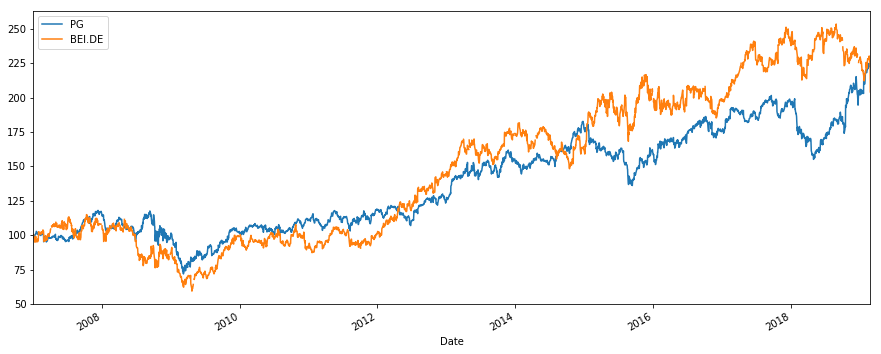

Individual Security Stats
            PG  BEI.DE
SROR   0.0003  0.0002
ASROR  0.0652  0.0549
STDV    0.174   0.218
VAR    0.0001  0.0002
AVAR   0.0303  0.0475

Portfolio stats
Rate of Return:		 6.0  %
Portfolio Variance:	 0.0243
Portfolio Volatility:	 15.59 %

Risk Assessment
Diversifiable Risk:		 4.38  %
Non-Diversifiable Risk:		 1.95  %


In [472]:
weights = np.array([0.5, 0.5])

SecStats, PortStats, RiskStats = PortfolioAnalysis( Pf, Dist = weights, verb = True, plot = True)

*Notes prepared by Austin Dial on 2/28/2019, rev. 3/21*